https://www.kaggle.com/mohansacharya/graduate-admissions

Task Details
Using the supplied predictive variables (GRE score, TOEFL score, University Rating, etc) to predict the likelihood of admission of a new candidate.

Evaluation Criteria
The best model should be the one that evaluates to have the lowest RMSE overall, and please indicate the error you get on validation set containing the last 100 observations.


1. Exploratory Analysis

2. Correlation Matrix

3. Linear Regression (CGPA - best correlation  / Chance of Admit)

4. Linear regression (GRE Score / Chance of Admit)

5. Multiple Linear Regression

6. Comparing Different Models


# Part 1
# Exploratory  Analysis

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [157]:
df = pd.read_csv('..input/Admission_Predict.csv')
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [158]:
print('Shape: ',df.shape, '\n')
print('info: ', df.info(),'\n')
print("None: ", df.isnull().sum())

Shape:  (400, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
info:  None 

None:  Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [159]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


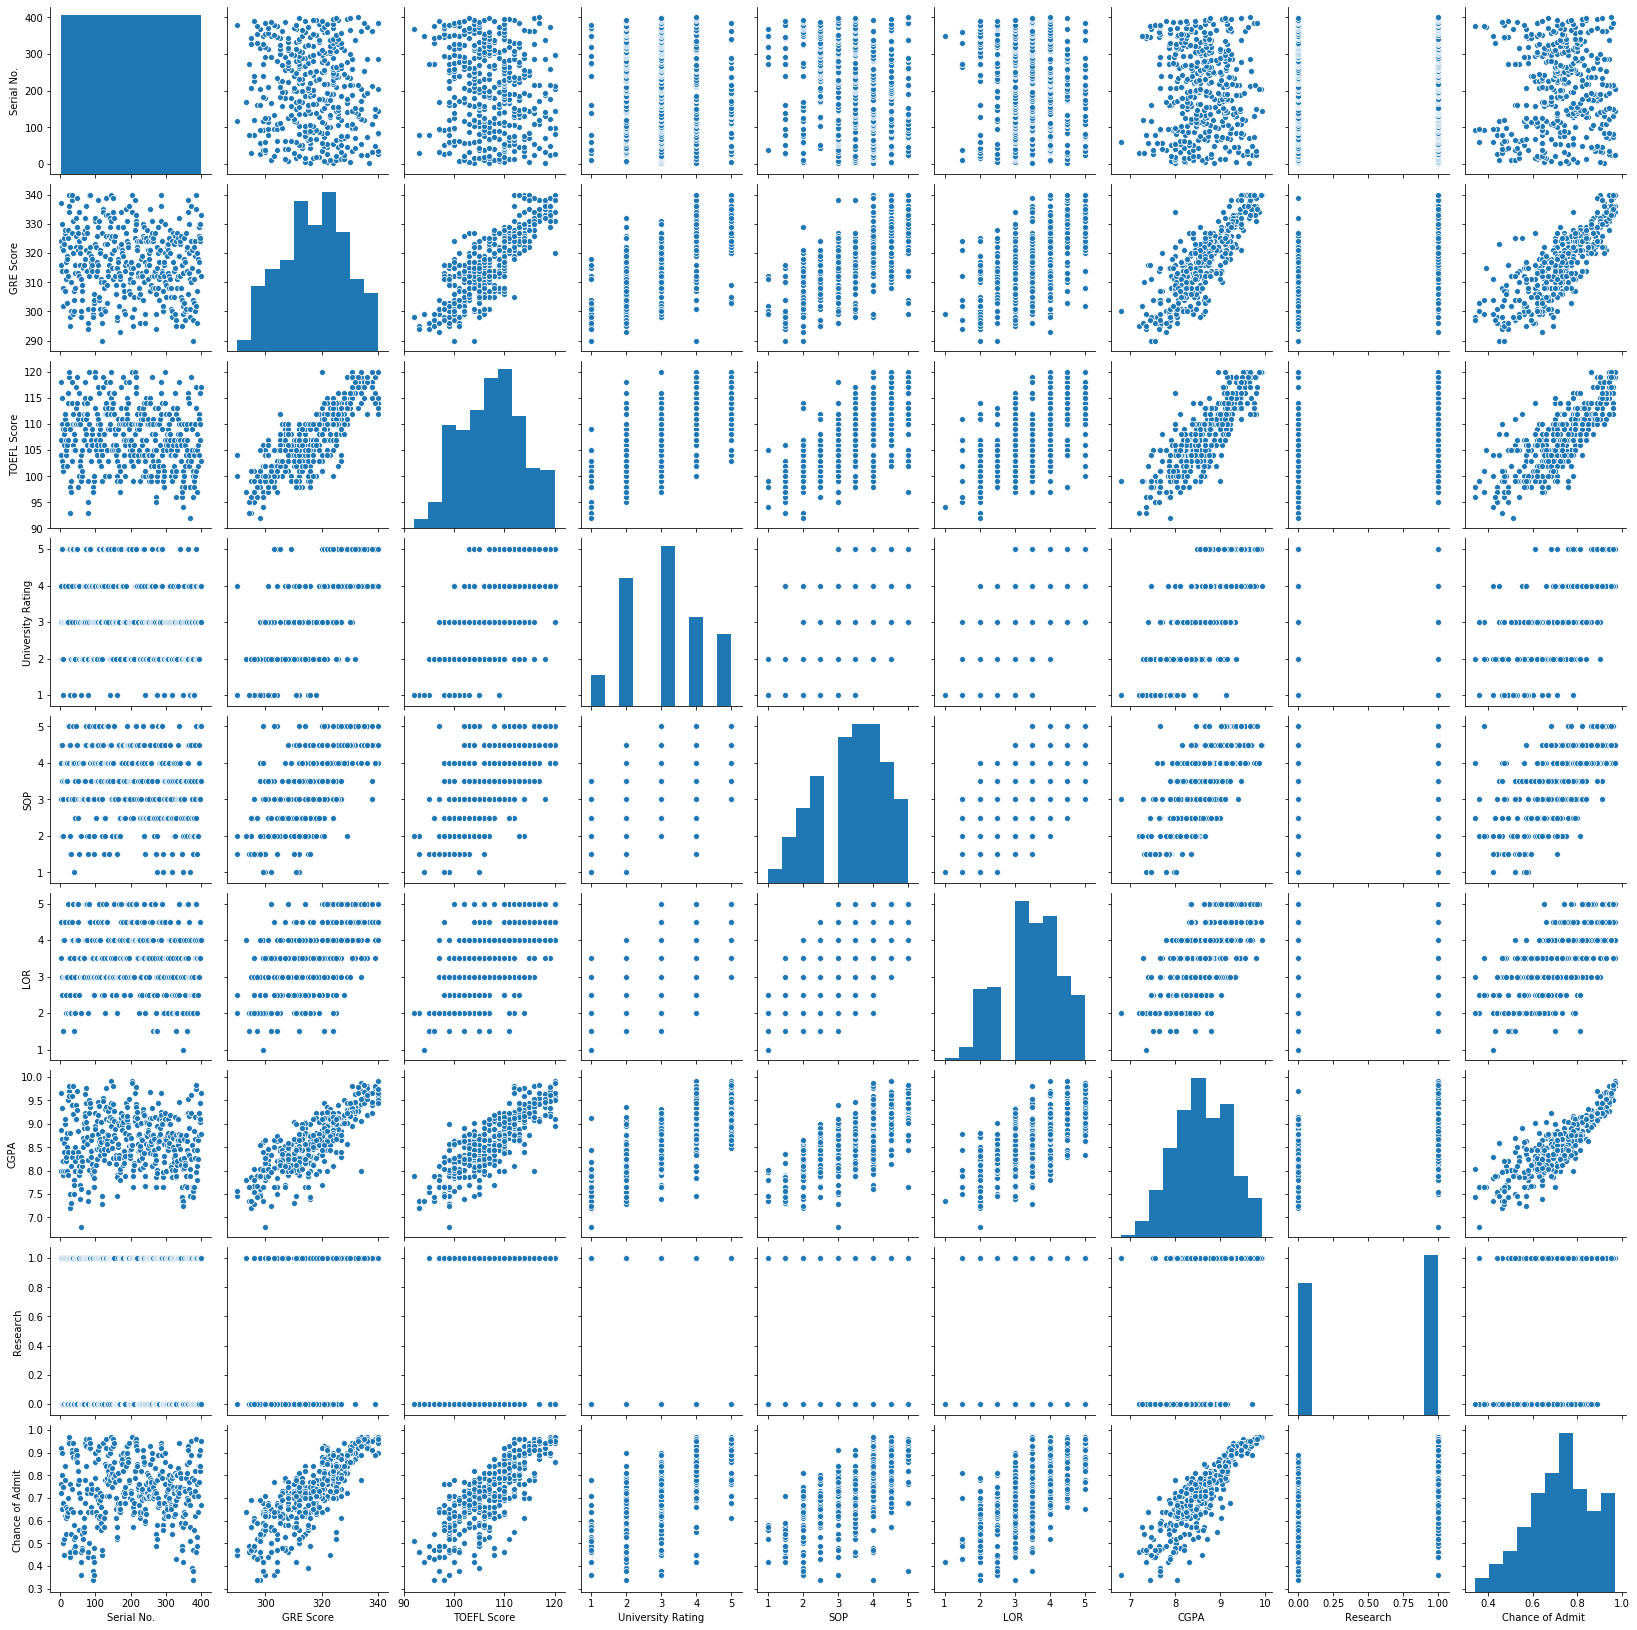

In [160]:
import seaborn as sns
sns.pairplot(df)

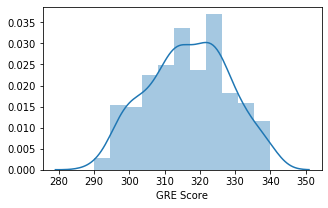

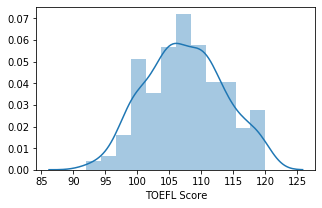

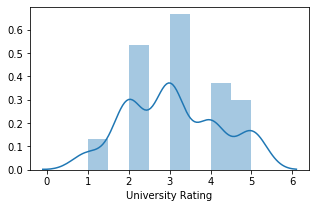

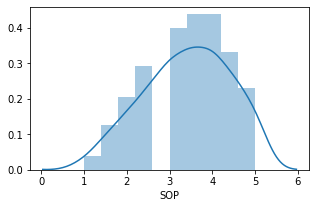

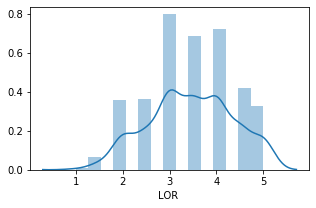

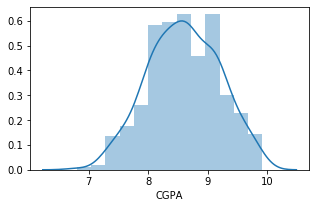

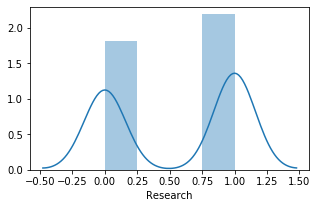

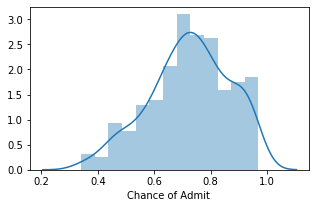

In [161]:
plt.figure(figsize = (5,3))
sns.distplot(df['GRE Score'])
plt.figure(figsize=(5,3))
sns.distplot(df['TOEFL Score'])
plt.figure(figsize=(5,3))
sns.distplot(df['University Rating'])
plt.figure(figsize=(5,3))
sns.distplot(df['SOP'])
plt.figure(figsize=(5,3))
sns.distplot(df['LOR '])
plt.figure(figsize=(5,3))
sns.distplot(df['CGPA'])
plt.figure(figsize=(5,3))
sns.distplot(df['Research'])
plt.figure(figsize=(5,3))
sns.distplot(df['Chance of Admit '])

In [162]:
print('LOR unique: ', df['LOR '].unique())
print('University Rating unique: ', df['University Rating'].unique())

LOR unique:  [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
University Rating unique:  [4 3 2 5 1]


# Part 2

# Correlation Matrix


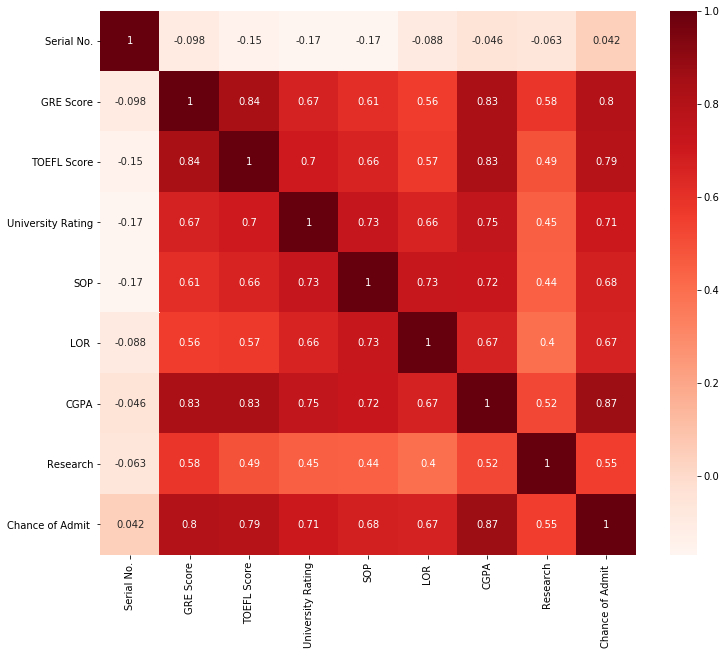

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(cor["Chance of Admit "])
#Selecting highly correlated features
relevant_features = cor_target
relevant_features.sort_values(ascending = False)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Chance of Admit , dtype: float64

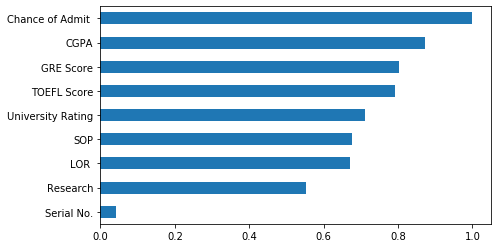

In [10]:

fig, ax = plt.subplots(figsize=(7,4))

ax = relevant_features.sort_values(ascending = True).plot(kind = 'barh')

# Part 3

# Linear regression

# CGPA

x:  (400, 1)
y:  (400,)
-1.0844197441854446
[0.21024339]
   Actual  Predicted
0    0.71   0.715264
1    0.70   0.723673
2    0.79   0.757312
3    0.73   0.652191
4    0.72   0.751005


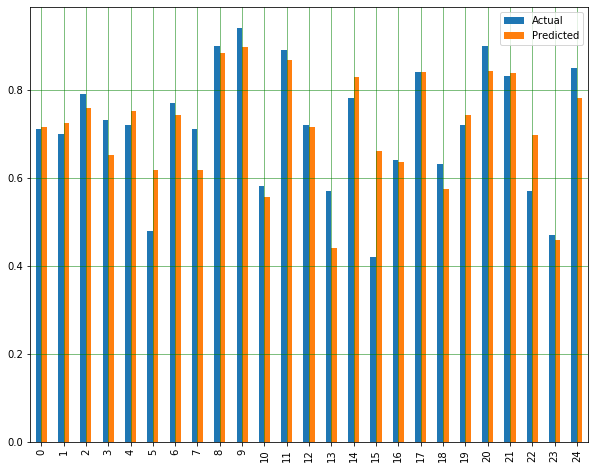

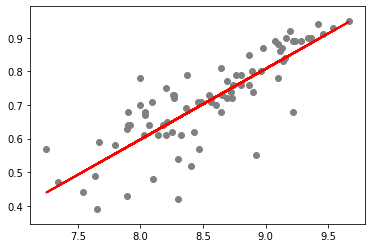

Mean Absolute Error: 0.05575475635573655
Mean Squared Error: 0.005939275570514724
Root Mean Squared Error: 0.0770666955987781


In [163]:
df = pd.read_csv('C:/Users/Maria/Desktop/homework/python/data for small projects/graduate admission/Admission_Predict.csv')
y = df['Chance of Admit '].values
x = df['CGPA'].values.reshape(-1,1)
print('x: ', x.shape)
print('y: ', y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(5))

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Part 4

# Linear Regression

# GRE Score

x:  (400, 1)
y:  (400,)
-2.4807599906587905
[0.01012352]
   Actual  Predicted
0    0.71   0.647408
1    0.70   0.637285
2    0.79   0.819508
3    0.73   0.617037
4    0.72   0.718273


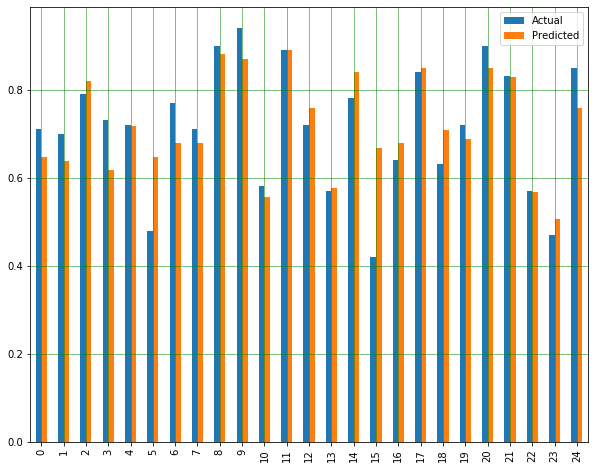

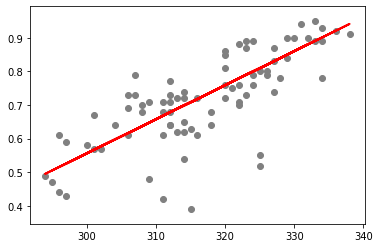

Mean Absolute Error: 0.06577018755736426
Mean Squared Error: 0.008254091184558793
Root Mean Squared Error: 0.09085202906131923


In [149]:
df = pd.read_csv('C:/Users/Maria/Desktop/homework/python/data for small projects/graduate admission/Admission_Predict.csv')
y = df['Chance of Admit '].values
x = df['GRE Score'].values.reshape(-1,1)
print('x: ', x.shape)
print('y: ', y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(5))

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Part 5

# Multiple Linear Regression


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv('C:/Users/Maria/Desktop/homework/python/data for small projects/graduate admission/Admission_Predict.csv')
df.head(3)
y = df['Chance of Admit ']
x = df.drop(['Chance of Admit '], axis =1)
print('x: ', x.shape)
print('y: ', y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns = ['Coeeficient'])
print(coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

x:  (400, 8)
y:  (400,)
                   Coeeficient
Serial No.            0.000153
GRE Score             0.002022
TOEFL Score           0.002733
University Rating     0.009867
SOP                  -0.000760
LOR                   0.019674
CGPA                  0.112510
Research              0.023854
     Actual  Predicted
132    0.71   0.692746
309    0.70   0.716284
341    0.79   0.799413
196    0.73   0.613828
246    0.72   0.724128
60     0.48   0.577243
155    0.77   0.698702
261    0.71   0.653053
141    0.90   0.859672
214    0.94   0.922089


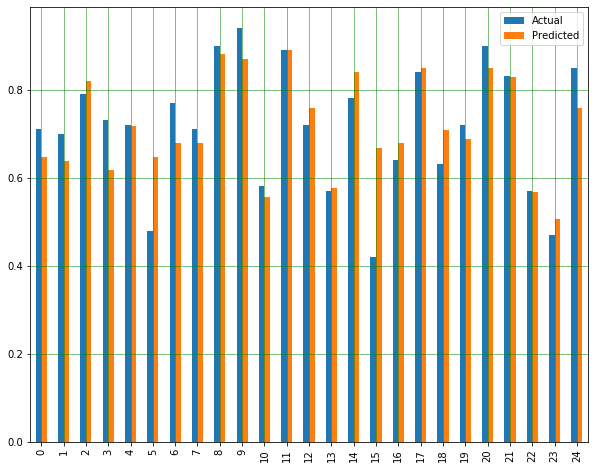

In [19]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.048191587000484024
Mean Squared Error: 0.004369598885687041
Root Mean Squared Error: 0.06610294158119623


# Part 6

# Compare different regression models

In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [24]:
models = []
models.append(('Linear Regression :', LinearRegression()))
models.append(('RandomForest :',RandomForestRegressor()))
models.append(('KNeighbours :', KNeighborsRegressor(n_neighbors = 2)))
models.append(('DecisionTree :',DecisionTreeRegressor()))
models.append(('RandomForest :',RandomForestRegressor()))
models.append(('AdaBoostClassifier :', AdaBoostRegressor()))
models.append(('GradientBoostingClassifier: ', GradientBoostingRegressor()))
models.append(('CatBoost: ', CatBoostRegressor(logging_level='Silent')))
models.append(('Lasso: ', Lasso()))
models.append(('Ridge: ', Ridge()))
models.append(('ElasticNet: ', ElasticNet()))
models.append(('SVM: ', SVR()))
models.append(('Xgboost: ', XGBRegressor()))

In [117]:

df = pd.read_csv('C:/Users/Maria/Desktop/homework/python/data for small projects/graduate admission/Admission_Predict.csv')

y = df['Chance of Admit ']
X = df.drop(['Chance of Admit '], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

names = []
results = []
for name,model in models:
    model = model
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, predictions))
    print(name, result)
    names.append(name)
    results.append(result)


Linear Regression : 0.06610294158119623
RandomForest : 0.06687793077690134
KNeighbours : 0.08109022752465306
DecisionTree : 0.092445930142976
RandomForest : 0.06834775234051228
AdaBoostClassifier : 0.06980056186714272
GradientBoostingClassifier:  0.06096944232557589
CatBoost:  0.058789550799112966
Lasso:  0.11515264536386086
Ridge:  0.06593567740008685
ElasticNet:  0.09420570822690794
SVM:  0.08175747302684609
Xgboost:  0.07081828436650241


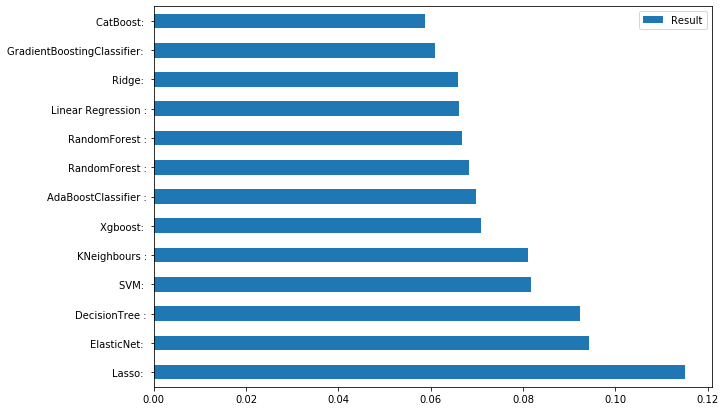

In [147]:
final = pd.DataFrame(results, names, columns = ['Result'])
final.sort_values('Result', ascending = False).plot(figsize = (10,7), kind = 'barh', )